# Tasks

1. Building a Data Pipeline.
2. Preprocessing Images for DL
3. Creating a Deep NN Classifier
4. Evaluating Model Performance
5. Saving the Model for Deployment

# 1. Setup and Load Data

In [1]:
!pip install tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\prajw\anaconda3\envs\tensorflow\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\prajw\anaconda3\envs\tensorflow\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\prajw\anaconda3\envs\tensorflow\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\prajw\anaconda3\envs\tensorflow\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\p

In [5]:
conda install tensorflow==2.10

error: incomplete escape \U at position 28

In [25]:
import tensorflow as tf

In [26]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
import os

In [28]:
os.path.join("data", "happpy")

'data\\happpy'

In [29]:
# Avoid OOM erroes by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [11]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 640.0 kB/s eta 0:01:01
   ---------------------------------------- 0.2/38.6 MB 2.6 MB/s eta 0:00:15
   ---------------------------------------- 0.3/38.6 MB 3.4 MB/s eta 0:00:12
   ---------------------------------------- 0.3/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.5/38.6 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.6 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.6 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.6 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.2/38.6 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.4/38.6 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.5/38.6 MB 3.7 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.6 MB 3.3 MB/s eta 0:00:12
   -

In [30]:
import imghdr

In [39]:
import matplotlib.pyplot as plt

In [31]:
import cv2

In [32]:
data_dir = 'data'

In [35]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

image_exts[0]

'jpeg'

In [37]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))

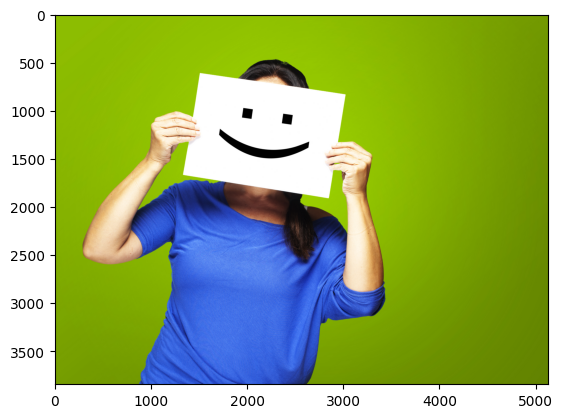

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [44]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issues with image {}".format(image_path))
            

image not in ext list data\happy\depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
image not in ext list data\happy\Happy20People.jpg
image not in ext list data\happy\traitshappypeople.jpg
image not in ext list data\sad\CC_HE_1221887081_SituationalDepression.jpg
image not in ext list data\sad\depositphotos_161575148-stock-photo-african-american-man-looking-at.jpg
image not in ext list data\sad\depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
image not in ext list data\sad\man-with-head-down.jpg
image not in ext list data\sad\portrait-sad-man-600nw-126009806.jpg
image not in ext list data\sad\sad-man-pictures-kjxgtb0t0ijlimlj.jpg
image not in ext list data\sad\Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
image not in ext list data\sad\Sad-Peop

In [48]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 216 files belonging to 2 classes.


In [62]:
#get another batch
data_iterator = data.as_numpy_iterator()

In [63]:
batch = data_iterator.next()

In [64]:
batch[1]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

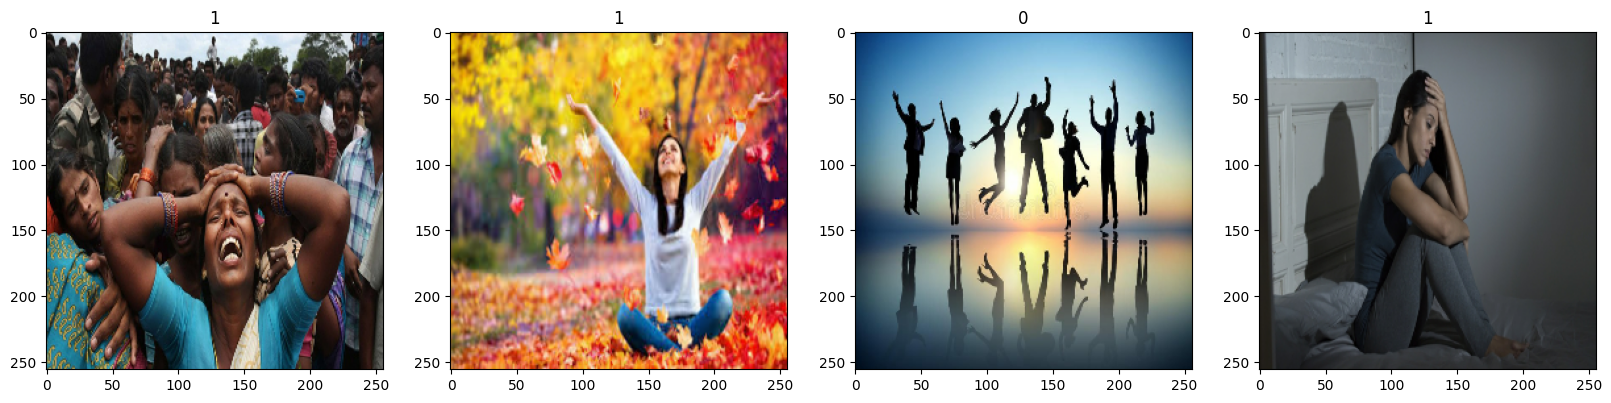

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][18:22]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [66]:
# class 1  = sad people
# class 0 = happy people

In [72]:
scaled = batch[0] / 255

In [73]:
scaled.max()

1.0

## preprocess data

2.1 Scale data

In [75]:
data = data.map(lambda x, y: (x/255, y))

In [83]:
data.as_numpy_iterator().next()[0].max()

1.0

### Split data

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [89]:
test_size

1

In [96]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [91]:
model = Sequential()


In [92]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [97]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 11s 593ms/step - loss: 1.0110 - accuracy: 0.6172 - val_loss: 0.7857 - val_accuracy: 0.3594
Epoch 2/20
4/4 [==============================] - 2s 373ms/step - loss: 0.7006 - accuracy: 0.5469 - val_loss: 0.6383 - val_accuracy: 0.6719
Epoch 3/20
4/4 [==============================] - 2s 333ms/step - loss: 0.5651 - accuracy: 0.6797 - val_loss: 0.5569 - val_accuracy: 0.8594
Epoch 4/20
4/4 [==============================] - 2s 386ms/step - loss: 0.5358 - accuracy: 0.7734 - val_loss: 0.5538 - val_accuracy: 0.6406
Epoch 5/20
4/4 [==============================] - 2s 385ms/step - loss: 0.4555 - accuracy: 0.7344 - val_loss: 0.3924 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 2s 378ms/step - loss: 0.4343 - accuracy: 0.9062 - val_loss: 0.3815 - val_accuracy: 0.8906
Epoch 7/20
4/4 [==============================] - 2s 357ms/step - loss: 0.3271 - accuracy: 0.8594 - val_loss: 0.3769 - val_accuracy: 0.8125
Epoch 8/20
4/4 [===

In [98]:
hist.history

{'loss': [1.0109621286392212,
  0.7005877494812012,
  0.5650999546051025,
  0.5358431339263916,
  0.4554794430732727,
  0.4343411922454834,
  0.3270896077156067,
  0.3341905176639557,
  0.2321934849023819,
  0.2694616913795471,
  0.15063591301441193,
  0.11756511777639389,
  0.20337003469467163,
  0.14627836644649506,
  0.13189710676670074,
  0.09886087477207184,
  0.09369847178459167,
  0.0614757239818573,
  0.03939354792237282,
  0.038338322192430496],
 'accuracy': [0.6171875,
  0.546875,
  0.6796875,
  0.7734375,
  0.734375,
  0.90625,
  0.859375,
  0.8828125,
  0.9140625,
  0.9375,
  0.9609375,
  0.9765625,
  0.9296875,
  0.9609375,
  0.953125,
  0.9765625,
  0.9609375,
  0.96875,
  0.984375,
  0.9921875],
 'val_loss': [0.7857306003570557,
  0.638349711894989,
  0.5569090247154236,
  0.5537907481193542,
  0.39239898324012756,
  0.3814772963523865,
  0.37690111994743347,
  0.18324077129364014,
  0.21502119302749634,
  0.12928812205791473,
  0.0700368583202362,
  0.10403937101364136,

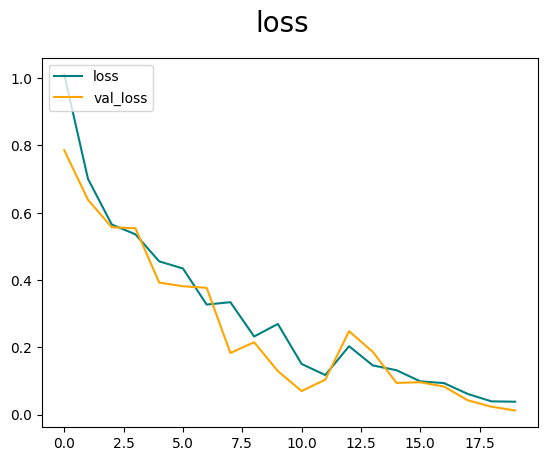

In [100]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],  color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

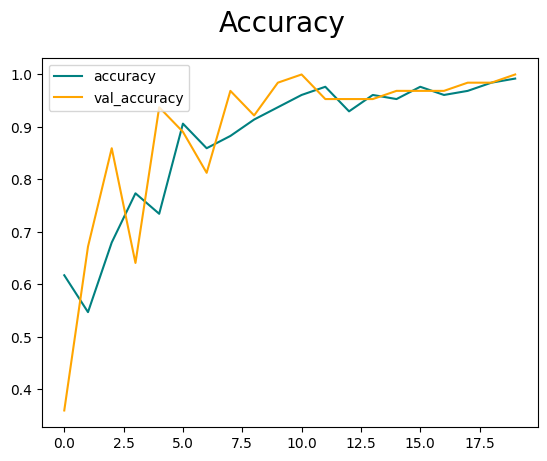

In [101]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],  color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluate Performance

In [102]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [103]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [104]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 565ms/step


In [105]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


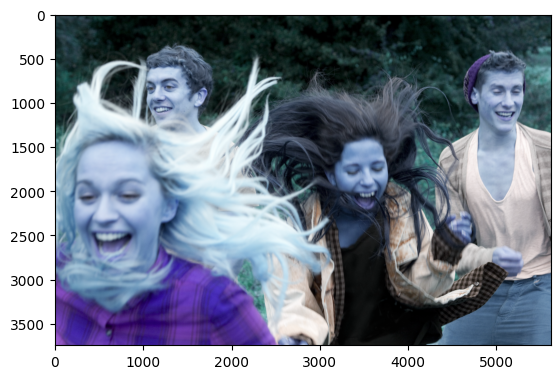

In [107]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

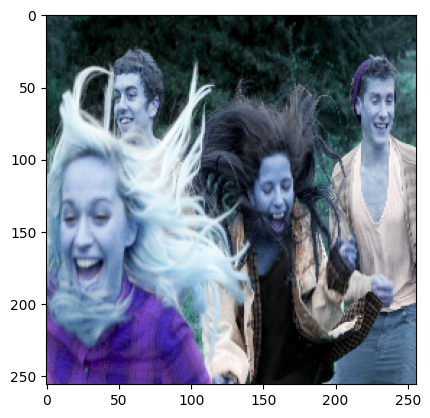

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
import numpy as np

In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 249ms/step


In [113]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


### Save the model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model.save(os.path.join('models','imageclassifier.h5'))

In [117]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5